Atividade 3: Modificar o seu código da Atividade 2, de tal forma a obter o modelo conhecido como MP, descrito pela equação (2.41) da minha tese
de doutorado, em anexo a este email. Observe que agora os sinais são complexos.
Para esse modelo MP, usar o conjunto de dados de entrada e saída enviados em anexo a este email da seguinte forma: usar os sinais "in_extraction" e "out_extraction" para obter os coeficientes. Usar os sinais "in_validation" e "out_validation" para obter a saída estimada do modelo. Uma vez tendo a saída estimada, calcular a métrica NMSE descrita pela equação (5.1) da minha tese de doutorado. Além disso, obter os gráficos: amplitude de saída em função da amplitude de entrada (AM-AM) e diferença entre fase de saída e de entrada em função da amplitude de entrada (AM-PM), para dados medidos e estimados.
Dica: o comando ()' calcula o transposto conjugado. O comando ().' calcula apenas o transposto. Normalmente você quer apenas o transposto, ou seja, você quer apenas adequar sua matriz para a dimensão correta.



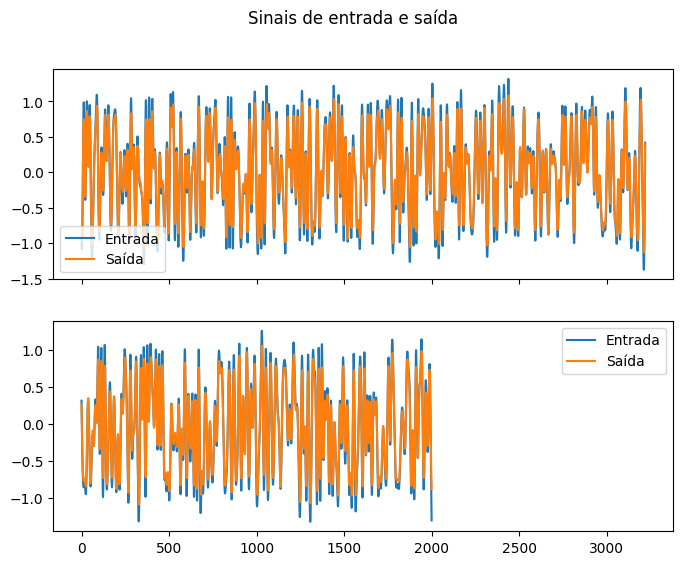

In [ ]:
from functions import *

# carregar arquivo .mat
mat = loadmat('in_out_SBRT2_direto.mat')

in_data_ext = mat['in_extraction']
out_data_ext = mat['out_extraction']
in_data_val = mat['in_validation']
out_data_val = mat['out_validation']

plot_signals(in_data_ext, out_data_ext, in_data_val, out_data_val)


In [3]:
M = 1
P = 2
XX_val = mp(P, M, in_data_val)
XX_ext = mp(P, M, in_data_ext)


In [4]:
coefficients, _, _, _ = np.linalg.lstsq(XX_ext, out_data_ext[M:], rcond=None)
predicted_val = XX_val @ coefficients

In [5]:
nmse = nmse_calculo(predicted_val,out_data_val, M)
print(nmse_calculo)

<function <lambda> at 0x7f9659dfdf80>


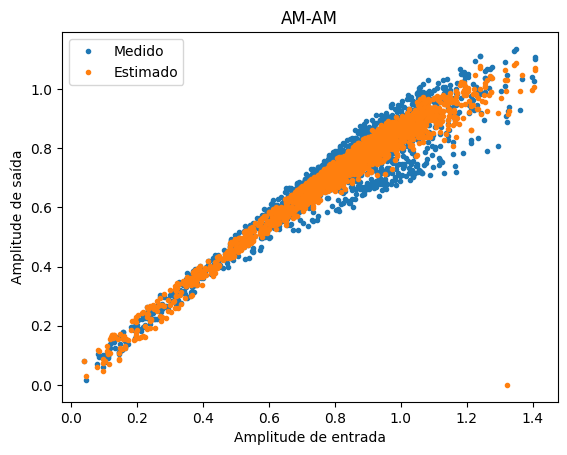

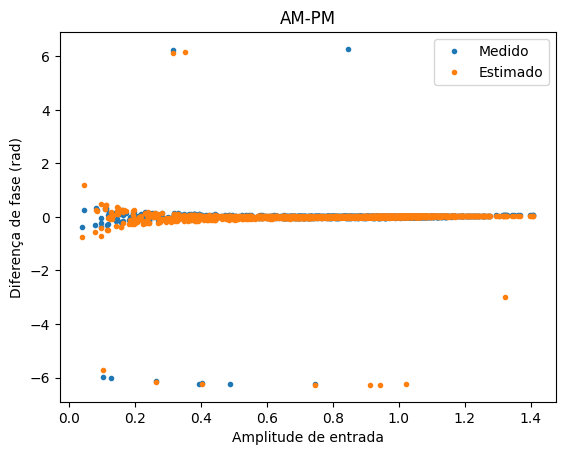

In [6]:
# Gráficos AM-AM e AM-PM
plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.abs(out_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.abs(predicted_val), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Amplitude de saída')
plt.title('AM-AM')
plt.legend()

plt.figure()
plt.plot(np.abs(in_data_val[M:]), np.angle(out_data_val[M:])-np.angle(in_data_val[M:]), '.', label='Medido')
plt.plot(np.abs(in_data_val[M:]), np.angle(predicted_val)-np.angle(in_data_val[M:]), '.', label='Estimado')
plt.xlabel('Amplitude de entrada')
plt.ylabel('Diferença de fase (rad)')
plt.title('AM-PM')
plt.legend()

plt.show()